In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
HP_df = pd.read_csv("train.csv")
HP_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Filter out the non-numerical columns
HP_df = HP_df.select_dtypes(include = ["number"])
HP_df = HP_df.dropna()
#HP_df=HP_df.drop(['Id'],axis=1)
# Prepare train/test split in our train data (no y in test)
split = int(0.8 * len(HP_df))

# Split the DataFrame into training and testing sets
train_df = HP_df[:split].dropna()
test_df = HP_df[split:].dropna()

display(train_df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1159,20,92.0,11932,8,5,2007,2008,186.0,0,...,0,24,0,0,0,0,0,6,2008,235128
1159,1160,60,76.0,9120,6,6,1974,1974,270.0,442,...,0,69,0,0,0,0,0,7,2008,185000
1160,1161,160,24.0,2280,6,5,1978,1978,0.0,311,...,26,0,0,0,0,0,0,7,2010,146000
1162,1163,20,109.0,8724,5,5,1968,1968,0.0,492,...,0,0,0,0,0,0,0,5,2007,129000


In [ ]:
# Model Expression:
#   L1 Ridge Regression - y = X\beta + error, where \beta = (X^T@X + \lambda@I)^-1 @ (X^T @ Y)
#   Linear Regression (single-var) - y = \beta1*x+ \beta_0, where \beta = cov(x,y)/ var(x)

# Prepare X-matrix and y vector
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']



# Calculate the regular LR beta
XT_x = np.dot(X.T, X)
XT_y = np.dot(X.T, y)

beta = np.dot(np.linalg.inv(XT_x), XT_y)


# Ridge Regression beta calculation
lambda_ = 1e6# our penalty
I = np.eye(X.shape[1])
beta_ridge = np.dot(np.linalg.inv(XT_x + lambda_ * I), XT_y)


print(I)
print("Beta coefficients for ridge regression:\n", beta_ridge)
print("Beta coefficients for regular regression:\n", beta)



'''
Reference: https://online.stat.psu.edu/stat857/node/155/
'''

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Beta coefficients for ridge regression:
 [   0.31363497  -58.21495415   -4.84067133    0.59691121   16.68535383
    3.54278653   84.36055051   63.36597606   42.96906183   29.21371049
   -0.92875039   10.56606766   38.85102776   20.78732685   32.92895514
  -13.61105773   40.10522426    0.34955643   -0.31933354    1.95186205
    1.45729519   -5.59399857   -1.88958823    0.27017502    3.12615005
   10.93557277    2.10028144   81.62149387   36.22909365   48.85405749
  -46.87525485   -7.49153925   51.69214148  -16.03325918  -12.34416303
   -3.67998984 -168.80698985]
Beta coefficients for regular regression:
 [-8.86703488e+01  5.57806435e+04  3.17341817e+05 -2.07658245e+02
 -1.39774461e+06  1.18548416e+07  3.16083462e+05 -3.54577910e+05
 -1.54137505e+03 -2.28627970e+16 -2.28627970e+16 -2.28627970e+16
  2.28627970e+16  1.20703759e+03  1.21

'\nReference: https://online.stat.psu.edu/stat857/node/155/\n'

In [ ]:
# Compare the betas with metrics

### Ridge ###
pos_mask = beta_ridge > 0

test_X = test_df.drop(columns=['SalePrice'])
test_X = test_X.loc[:, pos_mask]

test_y = test_df['SalePrice']

y = np.dot(beta_ridge[pos_mask], test_X.values.T) + (np.mean(test_y) - np.dot(beta_ridge[pos_mask],
                                                                              np.mean(test_X.values, axis=0)))

test_y_values = test_y.values  # convert test_y to a numpy array

SSR = np.sum((y - test_y_values)**2)
SST = np.sum((test_y_values - np.mean(test_y_values))**2)

R2 = 1 - SSR / SST
print("ridge-beta R^2: ", R2)

### Use overallQual as the only beta: manual ###
train_X = train_df.drop(columns=['SalePrice'])
train_X = train_X[["OverallQual"]].values
train_y = train_df['SalePrice'].values

test_y = test_df['SalePrice']
test_X = test_df["OverallQual"]

cov_xy = 0
var_x = 0
if len(train_X ) == len(train_y ):
    for i in range(len(train_X)):

        cov_xy += (train_X[i] - np.mean(train_X))*(train_y[i] - np.mean(train_y))
        var_x += pow((train_X[i] - np.mean(train_X)),2)

m = cov_xy / var_x
b = np.mean(train_y) - (m*np.mean(train_X)) # we obtain b by rearrangement

y = m*test_X + b
y = np.array(y[:len(test_y)])

test_y_values = test_y.values

SSR = np.sum((y - test_y_values)**2)
SST = np.sum((test_y_values- np.mean(test_y_values))**2)

R2 = 1 - SSR / SST

print("single beta R^2: ", R2)

ridge-beta R^2:  0.33660016988514363
single beta R^2:  0.5860038832202537


In [ ]:
### Use overallQual as the only beta: library ###
X = HP_df.drop(columns=['SalePrice'])
X = X[["OverallQual"]]
Y= HP_df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)



model = LinearRegression()
model.fit(X_train, Y_train)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
# call the metrics
mse = mean_squared_error(Y_test, test_predictions)
print("OverallQaul RMSE:", np.sqrt(mse))
r2_test= r2_score(Y_test, test_predictions)
print("R2 - test:", r2_test)

r2_train = r2_score(Y_train, train_predictions)
print("R2 - train:", r2_train)

OverallQaul RMSE: 58157.88489532889
R2 - test: 0.5711674996177418
R2 - train: 0.6544111480987971


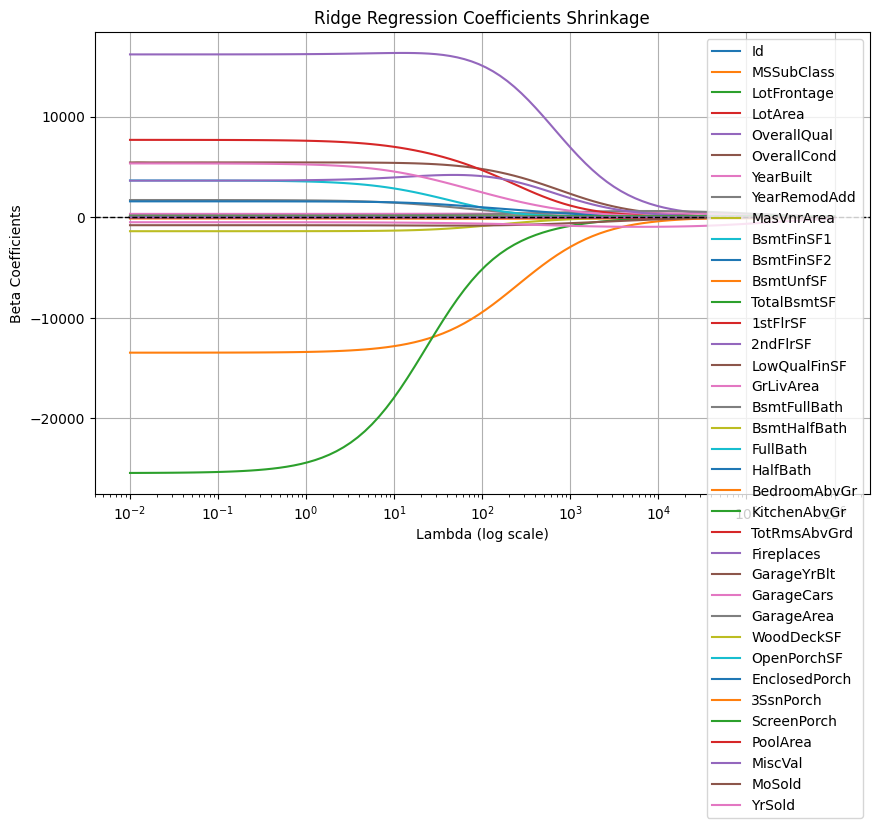

In [ ]:
# Plot of variable shrinkage
X = test_df.drop(columns=['SalePrice'])
lambda_values = np.logspace(-2, 6, 100)
ridge_coefficients = []

for lambda_ in lambda_values:
    I = np.eye(X.shape[1])
    beta_ridge = np.dot(np.linalg.inv(XT_x + lambda_ * I), XT_y)
    ridge_coefficients.append(beta_ridge)
ridge_coefficients = np.array(ridge_coefficients)

# Plot each feature's shrinkage path
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(lambda_values, ridge_coefficients[:, i], label=f'{HP_df.columns[i]}')

plt.xscale('log')  # Log scale for lambda
plt.xlabel("Lambda (log scale)")
plt.ylabel("Beta Coefficients")
plt.title("Ridge Regression Coefficients Shrinkage")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Choosing several Ridge lambda to determine the  most probable regressors


lambda_values = [10**(i) for i in range(-2, 7)]
ridge_coefficients = []
ridge_rmse_calc = {}
for lambda_ in lambda_values:
    I = np.eye(X.shape[1])
    beta_ridge = np.dot(np.linalg.inv(XT_x + lambda_ * I), XT_y)
    ridge_coefficients.append(beta_ridge)

ridge_coefficients = np.array(ridge_coefficients)

for i in range(len(ridge_coefficients)):
    sorted_indices = np.argsort(ridge_coefficients[i])[::-1]
    top_5_indices = sorted_indices[:5]
    top_5_columns = HP_df.columns[top_5_indices]
    ridge_rmse_calc[lambda_values[i]] = top_5_columns.tolist()
    print(f"\nLambda = {lambda_values[i]}")
    print("Top 5 coefficients:", ridge_coefficients[i][top_5_indices])
    print("Top 5 columns:", top_5_columns.tolist())


'''
def top3_idx(nums):
   l, r = 0, len(nums) - 1
   top3 = {}

   while l < r:print(np.sqrt(2681026163.5090904))
      for item, _ in enumerate(top3):
         if nums[l] > top3[key]:
            top3[nums[l]] = l
'''



Lambda = 0.01
Top 5 coefficients: [16171.09692447  7680.34676542  5432.93865164  5339.73166959
  3648.41450457]
Top 5 columns: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'FullBath']

Lambda = 0.1
Top 5 coefficients: [16172.8353602   7672.29416419  5440.56674167  5330.0505581
  3638.99259358]
Top 5 columns: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'FullBath']

Lambda = 1
Top 5 coefficients: [16197.52415541  7594.21598302  5438.17825946  5236.49141764
  3676.36880644]
Top 5 columns: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'Fireplaces']

Lambda = 10
Top 5 coefficients: [16312.16315262  6987.27364581  5394.93055688  4532.63640762
  3949.04760497]
Top 5 columns: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'Fireplaces']

Lambda = 100
Top 5 coefficients: [15050.3757392   4782.57194278  4665.27604992  4073.62121596
  2459.39346063]
Top 5 columns: ['OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars

'\ndef top3_idx(nums):\n   l, r = 0, len(nums) - 1\n   top3 = {}\n\n   while l < r:print(np.sqrt(2681026163.5090904))\n      for item, _ in enumerate(top3):\n         if nums[l] > top3[key]:\n            top3[nums[l]] = l\n'

In [ ]:
X = HP_df.drop(columns=['SalePrice'])
X = X[["YearBuilt"]]
Y= HP_df["SalePrice"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)



model = LinearRegression()
model.fit(X_train, Y_train)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
# call the metrics
mse = mean_squared_error(Y_test, test_predictions)
print("YearBuilt RMSE:", np.sqrt(mse))
r2_test= r2_score(Y_test, test_predictions)
print("R2 - test:", r2_test)

r2_train = r2_score(Y_train, train_predictions)
print("R2 - train:", r2_train)

YearBuilt RMSE: 79971.14333922046
R2 - test: 0.18915639589647204
R2 - train: 0.2990255608694403


In [ ]:

ridge_rmse_calc

{0.01: ['OverallQual',
  'TotRmsAbvGrd',
  'OverallCond',
  'GarageCars',
  'FullBath'],
 0.1: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'FullBath'],
 1: ['OverallQual', 'TotRmsAbvGrd', 'OverallCond', 'GarageCars', 'Fireplaces'],
 10: ['OverallQual',
  'TotRmsAbvGrd',
  'OverallCond',
  'GarageCars',
  'Fireplaces'],
 100: ['OverallQual',
  'OverallCond',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars'],
 1000: ['OverallQual',
  'OverallCond',
  'Fireplaces',
  'TotRmsAbvGrd',
  'GarageCars'],
 10000: ['OverallQual',
  'YearRemodAdd',
  'OverallCond',
  'YearBuilt',
  'Fireplaces'],
 100000: ['YearRemodAdd',
  'YearBuilt',
  'OverallQual',
  'ScreenPorch',
  'GarageArea'],
 1000000: ['YearBuilt',
  'GarageArea',
  'YearRemodAdd',
  'ScreenPorch',
  'OpenPorchSF']}

In [ ]:


for lambda_, top_columns in ridge_rmse_calc.items():

    X = HP_df[top_columns]
    y = HP_df['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)

    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
    r2_train = r2_score(y_train, train_predictions)
    rmse_test = np.sqrt(mean_squared_error(y_test,test_predictions))
    r2_test = r2_score(y_test, test_predictions)


    print(f"test rmse: {rmse_test}")
    print(f"test R^2: {r2_test}")
    print("------------------------------")




test rmse: 51440.31336277711
test R^2: 0.6645114549187313
------------------------------
test rmse: 51440.31336277711
test R^2: 0.6645114549187313
------------------------------
test rmse: 50277.46986209484
test R^2: 0.679507911064648
------------------------------
test rmse: 50277.46986209484
test R^2: 0.679507911064648
------------------------------
test rmse: 50277.46986209484
test R^2: 0.679507911064648
------------------------------
test rmse: 50277.46986209483
test R^2: 0.679507911064648
------------------------------
test rmse: 55526.61820809486
test R^2: 0.6090934629172233
------------------------------
test rmse: 54644.69944495982
test R^2: 0.6214122404199978
------------------------------
test rmse: 67766.75925573542
test R^2: 0.41775747760988846
------------------------------


51778.62651238531
